In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

## 시각화는 2가지 유형이 있음

1. INBOUND : 내가 보기 위해

2. OUTBOUND : 남에게 보여주기 위해

INBOUND는 빠르고 보여주고 간결해야함

OUTBOUND는 디테일해야함(보여줄 회사 로고 색깔과 시각화 색깔을 맞추는 등)

OUTBOUND로는 Tableau(언어 필요X), D3.js(언어 필요)가 있음

python에서 많이 쓰는건 matplotlib

그러나 이건 간단한 시각화를 하는 데도 코드가 많이 필요

그래서 우선 seaborn을 main으로 사용 matplotlib은 서브로 사용

In [62]:
import pandas as pd

# Load Dataset

In [63]:
# 서울시에서 제공하는 건강검진 데이터
url = 'https://bit.ly/dsa-04-health'

data = pd.read_csv(url)

print(data.shape)
data.head()

(1000, 34)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,465969,1,8,41,170.0,70.0,74.0,0.7,0.7,...,96.0,3.0,NaN,1,NaN,NaN,NaN,NaN,2.0,20171219
1,2016,565871,1,10,41,160.0,60.0,81.0,1.2,1.0,...,14.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,115718,2,11,11,160.0,55.0,71.0,1.0,1.0,...,20.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219
3,2016,767524,1,6,28,180.0,70.0,79.0,1.0,0.9,...,16.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
4,2016,482178,2,9,11,160.0,60.0,85.0,0.8,1.2,...,13.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219


# Explore

In [64]:
import seaborn as sns

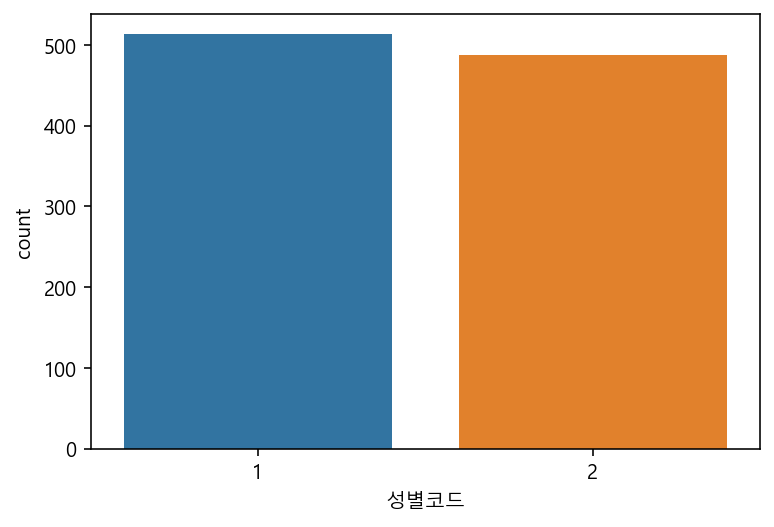

In [65]:
sns.countplot(data = data, x= '성별코드')

## 그래프에 한글 폰트가 깨짐
## 이를 해결하기 위해선 seaborn의 원조인 matplotlib이 필요

In [66]:
import matplotlib
import seaborn as sns

# Windows
#matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('font', family = 'Malgun Gothic')

# MacOS
#matplotlib.rc('font', family = 'AppleGothic')

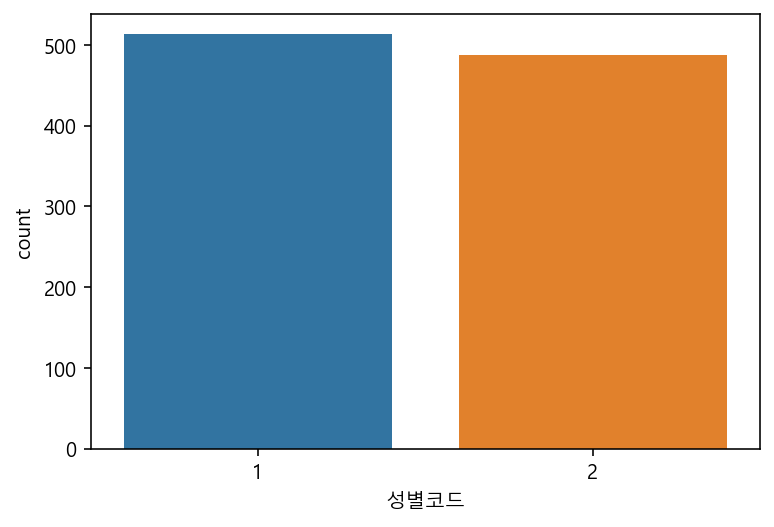

In [67]:
sns.countplot(data = data, x = '성별코드')

## Default로 Setting

In [68]:
import matplotlib
import seaborn as sns

# 만약 그래프의 글씨가 흐릿하다면
from IPython.display import set_matplotlib_formats

# 한글 폰트가 깨질 때

# Windows
#matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('font', family = 'Malgun Gothic')

# MacOS
#matplotlib.rc('font', family = 'AppleGothic')

# 그래프 글씨 흐릿할 때
# Retina
set_matplotlib_formats('retina')

# Minus 기호가 깨질 때
matplotlib.rc('axes', unicode_minus = False)

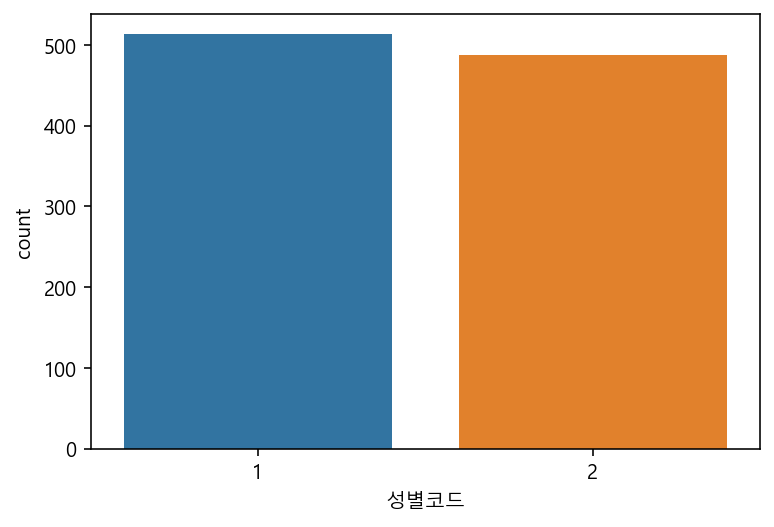

In [69]:
sns.countplot(data = data, x = '성별코드')

## 사이즈 조절하기

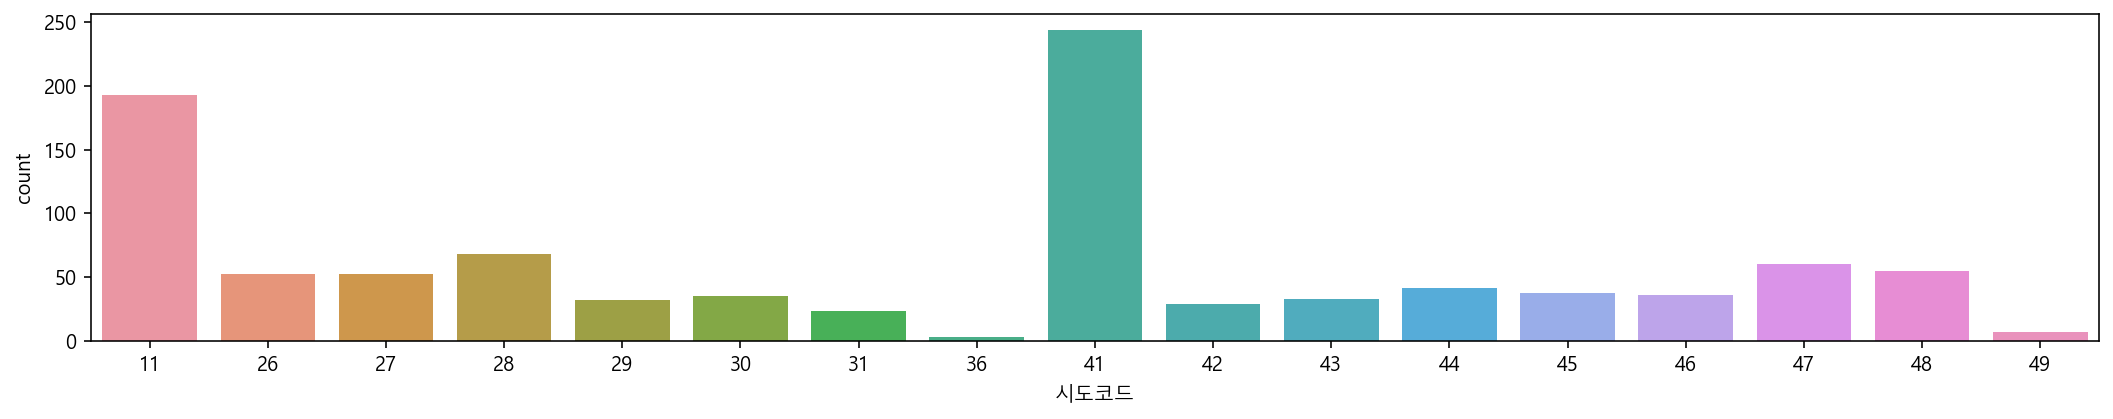

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 3))

sns.countplot(data = data, x = '시도코드')

## 여러 개의 시각화를 한 번에 띄우기

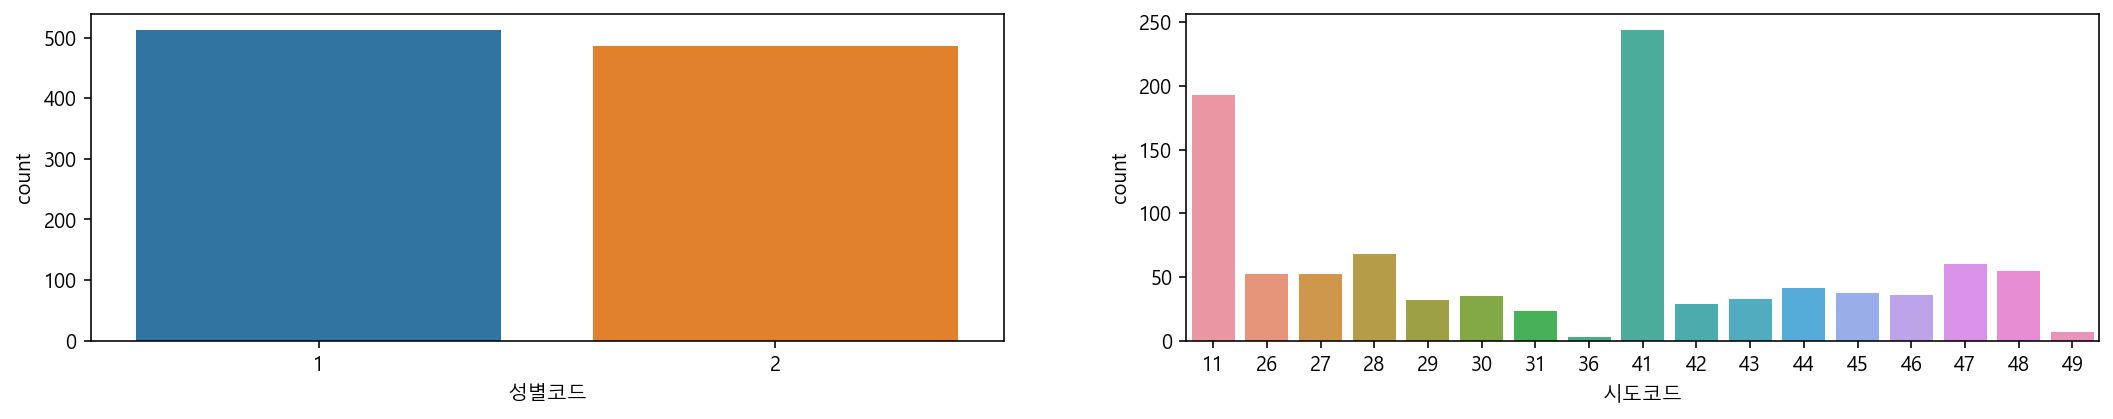

In [71]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)

figure.set_size_inches(18, 3)

sns.countplot(data = data, x = '성별코드', ax = ax1)
sns.countplot(data = data, x = '시도코드', ax = ax2 )

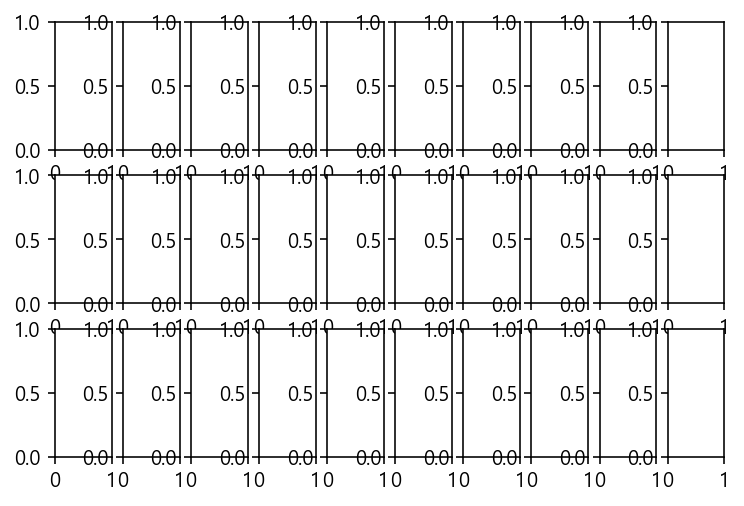

In [72]:
# figure, ax1 = plt.subplots(nrows = 1, ncols = 1)
#figure, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
#figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)

## 수가 굉장히 많을 때
figure, axes = plt.subplots(nrows = 3, ncols = 10)

## 컬러 선택하기

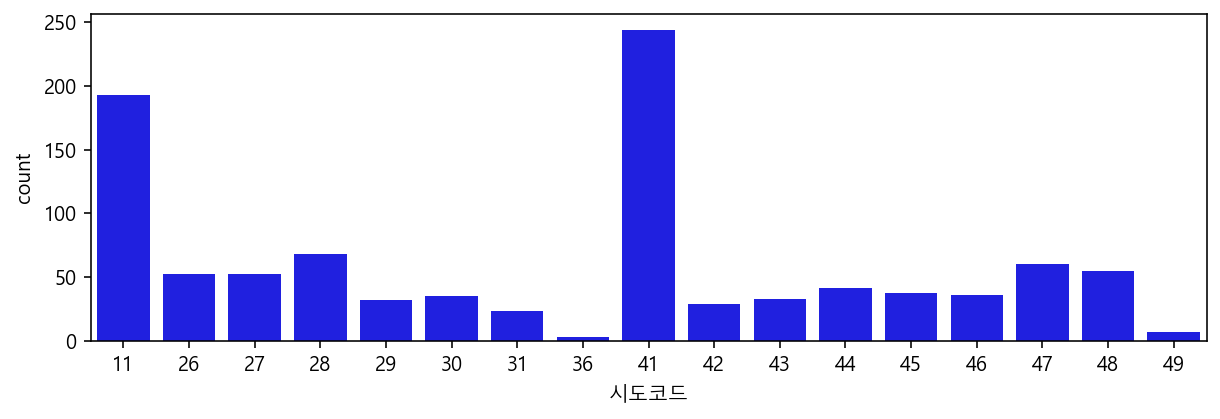

In [73]:
plt.figure(figsize = (10, 3))
sns.countplot(data = data, x = '시도코드', color = 'b')
# 간혹 디자이너가 요청하는 경우
# sns.countplot(data = data, x = '시도코드', color = '#80e666')

## palette (seaborn에서 이미 칼라를 조합한 버전을 제공)

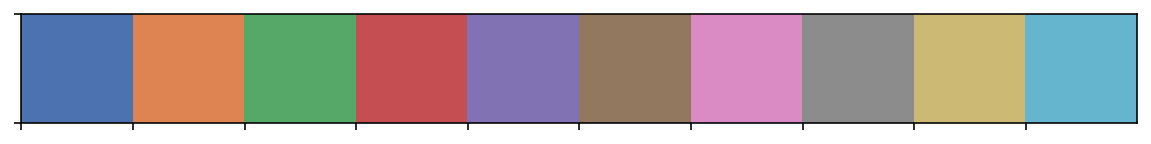

In [74]:
palette = sns.color_palette('deep', 10)
sns.palplot(palette)

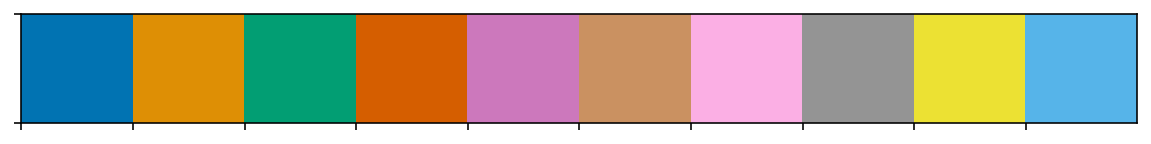

In [75]:
palette = sns.color_palette('colorblind', 10)
sns.palplot(palette)

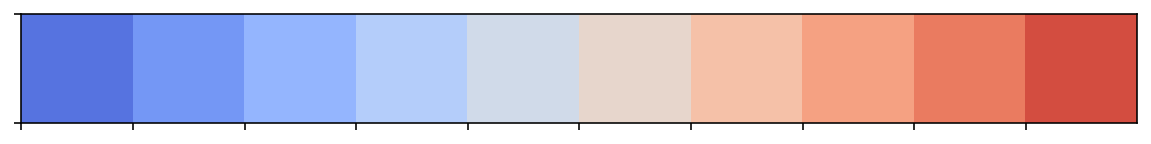

In [76]:
palette = sns.color_palette('coolwarm', 10)
sns.palplot(palette)

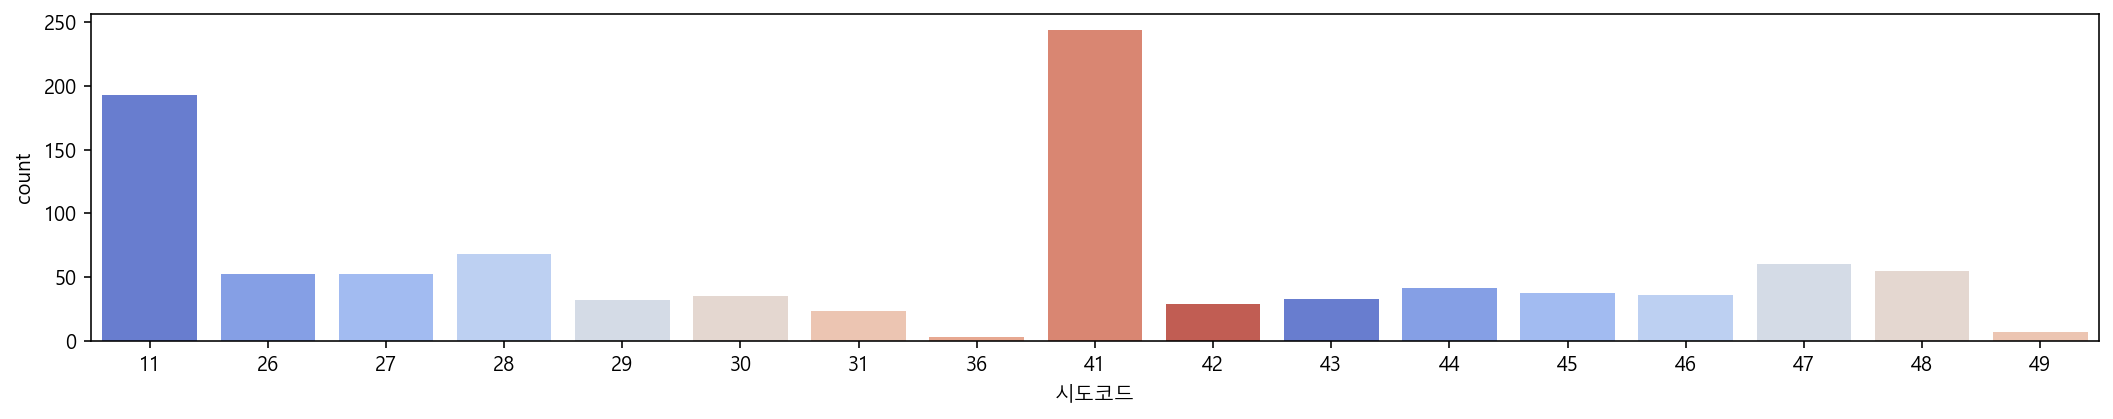

In [77]:
palette = sns.color_palette('coolwarm', 10)


plt.figure(figsize = (18, 3))
sns.countplot(data = data, x = '시도코드', palette = palette) 

## countplot

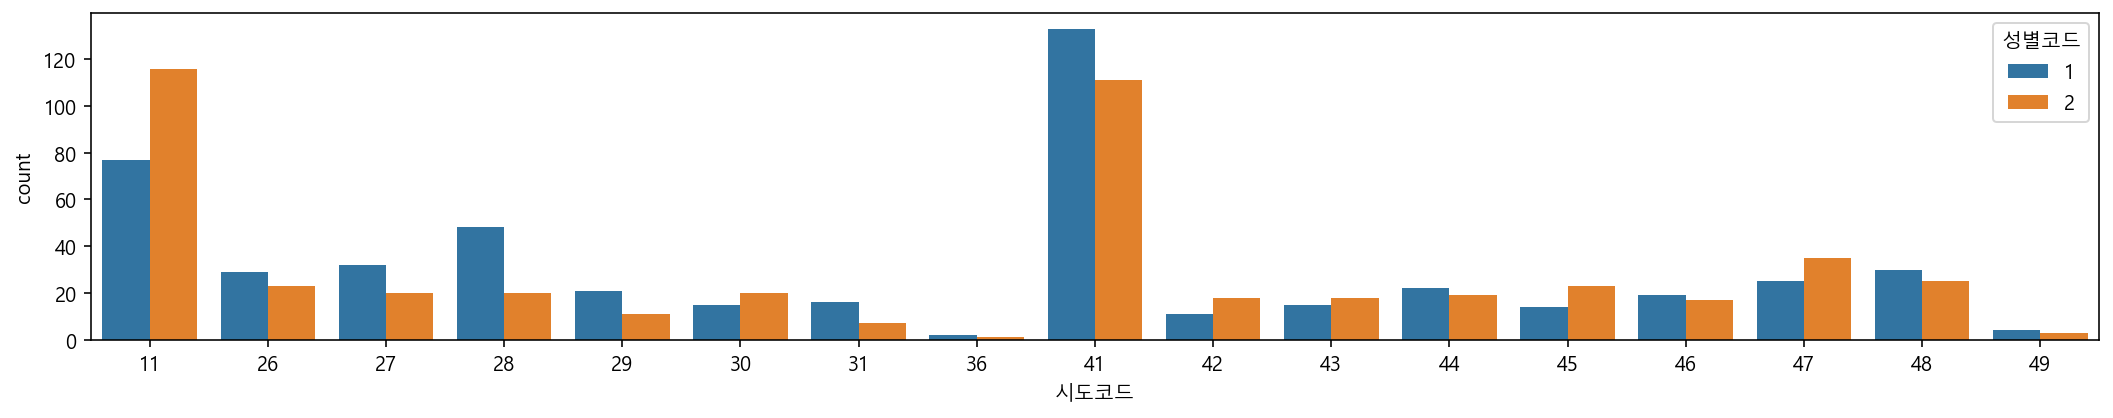

In [78]:
plt.figure(figsize = (18, 3))
sns.countplot(data = data, x = '시도코드', hue = '성별코드')

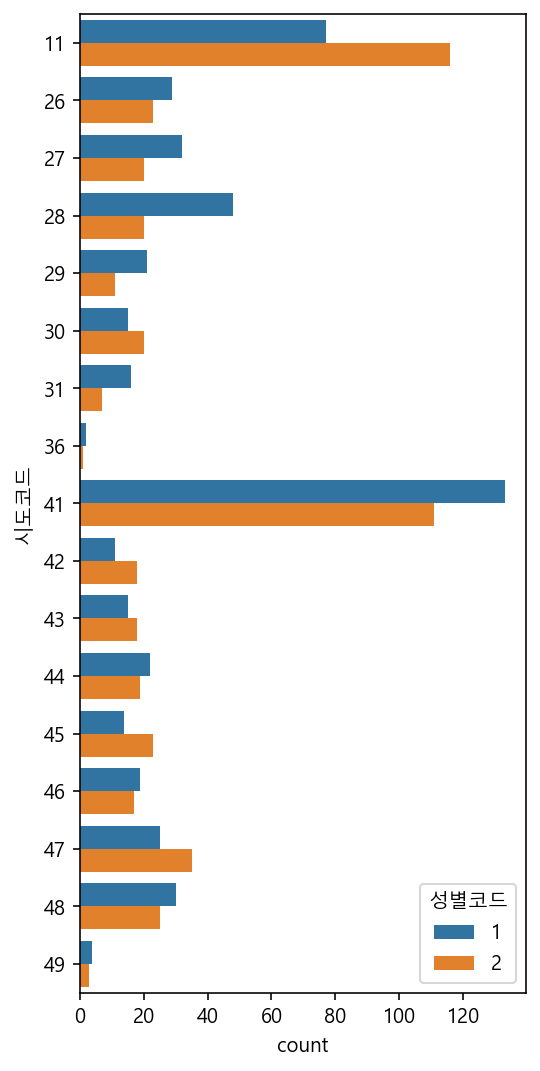

In [79]:
# x축이 엄청 많을 경우 세로로 배치할 수 있음
# 그리고 사이즈도 세로가 길게

plt.figure(figsize = (4, 9))
sns.countplot(data = data, y = '시도코드', hue = '성별코드')

## distplot (dist는 distribution(분포)의 약자)

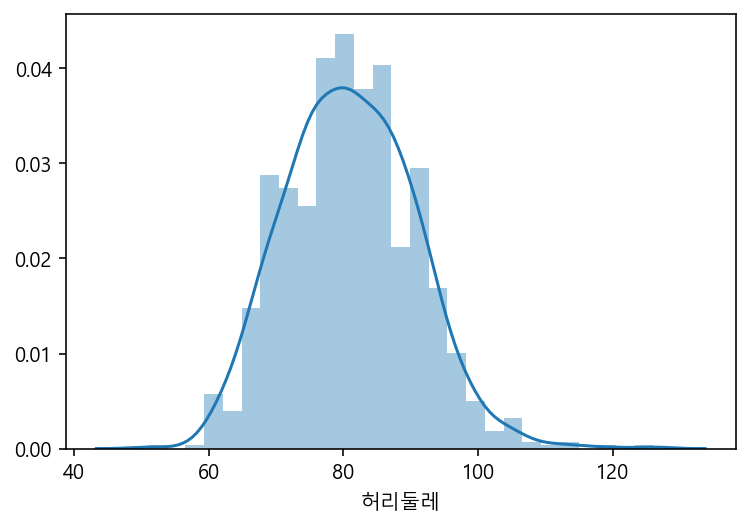

In [80]:
# 선(kde plot)을 main으로 보고 신뢰하는 것이 좋음
# bar는 histogram이고 서브로 보는 것이 좋음
# histogram을 볼 때는 bar의 왼쪽 경계를 보기

sns.distplot(data['허리둘레'])

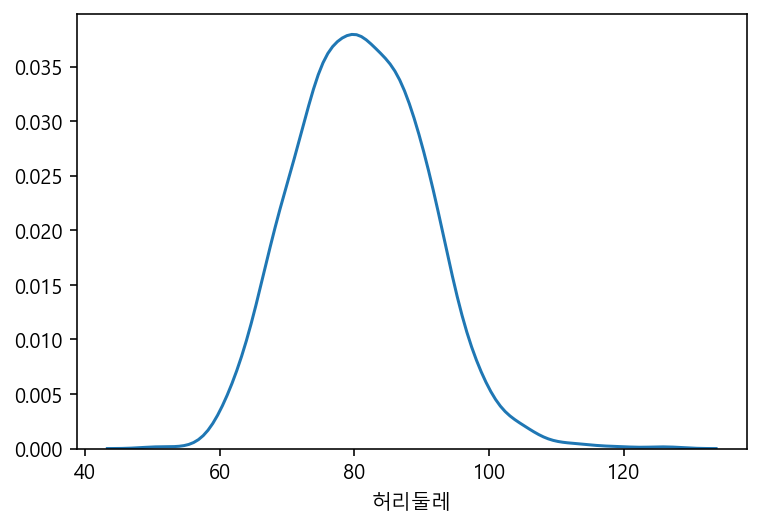

In [81]:
# histogram 안보이기  
sns.distplot(data['허리둘레'], hist = False)

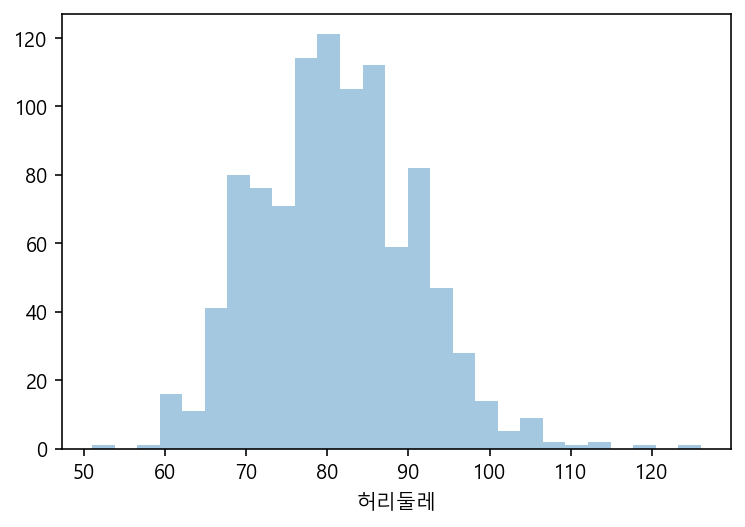

In [82]:
# kde plot 안보이기  
sns.distplot(data['허리둘레'], kde = False)

In [83]:
# 1: 흡연X
# 2: 흡연했다가 금연
# 3: 지금도 흡연

data['흡연상태']

0      3.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    3.0
Name: 흡연상태, Length: 1000, dtype: float64

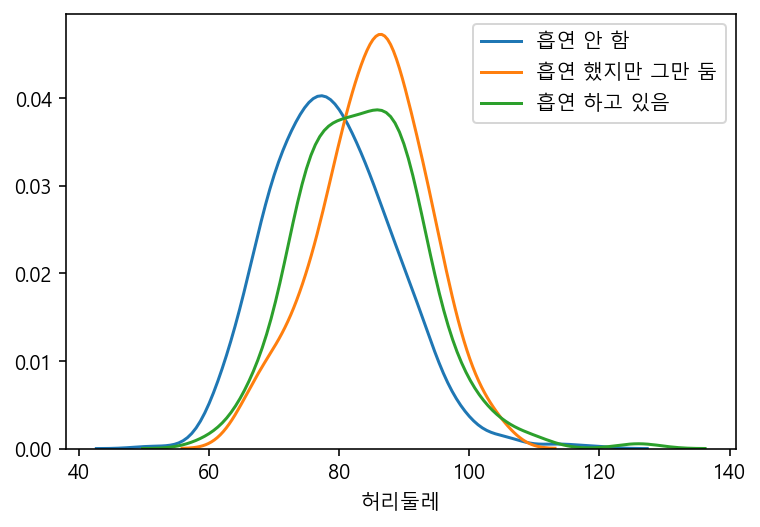

In [84]:
one = data[data['흡연상태'] == 1]
two = data[data['흡연상태'] == 2]
three = data[data['흡연상태'] == 3]

sns.distplot(one['허리둘레'], hist = False, label = '흡연 안 함')
sns.distplot(two['허리둘레'], hist = False, label = '흡연 했지만 그만 둠')
sns.distplot(three['허리둘레'], hist = False, label = '흡연 하고 있음')

## barplot (countplot 응용)

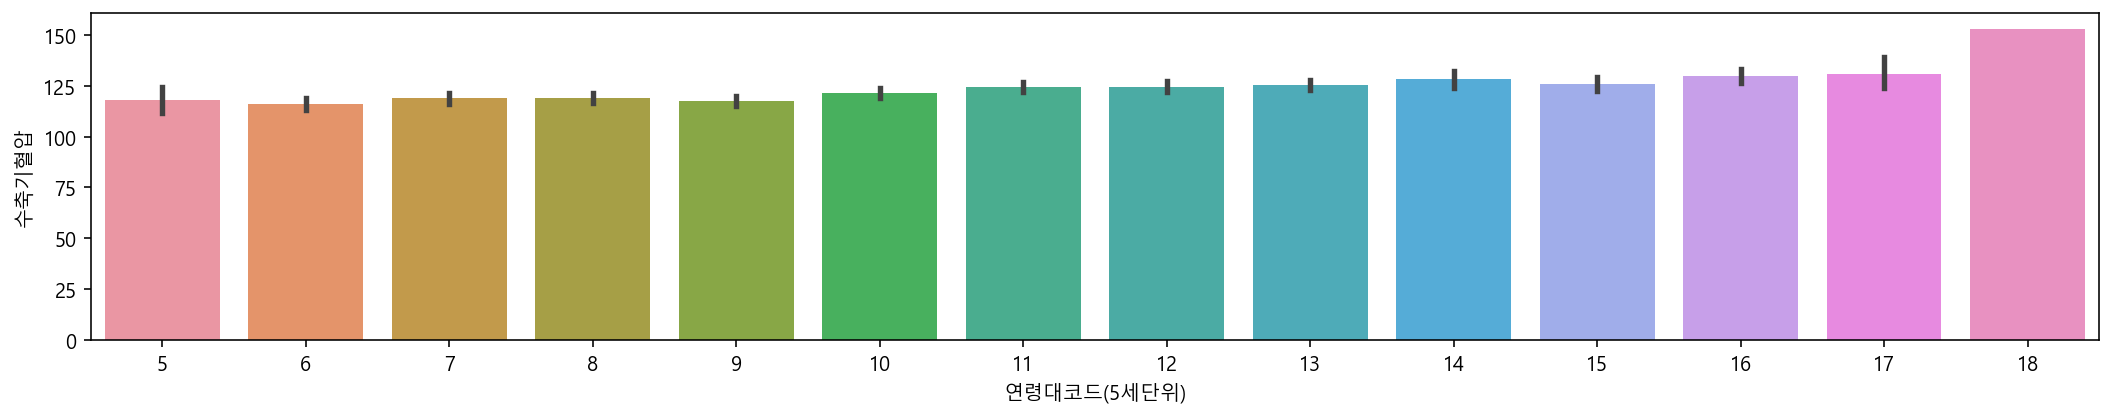

In [88]:
# countplot과 barplot의 차이
# coutplot은 y축을 지정 못하는 대신 자동적으로 데이터의 개수를 셈
# barplot은 y축을 지정할 수 있는데 조건이 있음: 숫자여야함. 그 숫자의 평균을 출력
# 검은색 선은 신뢰구간

plt.figure(figsize = (18, 3))
sns.barplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압')

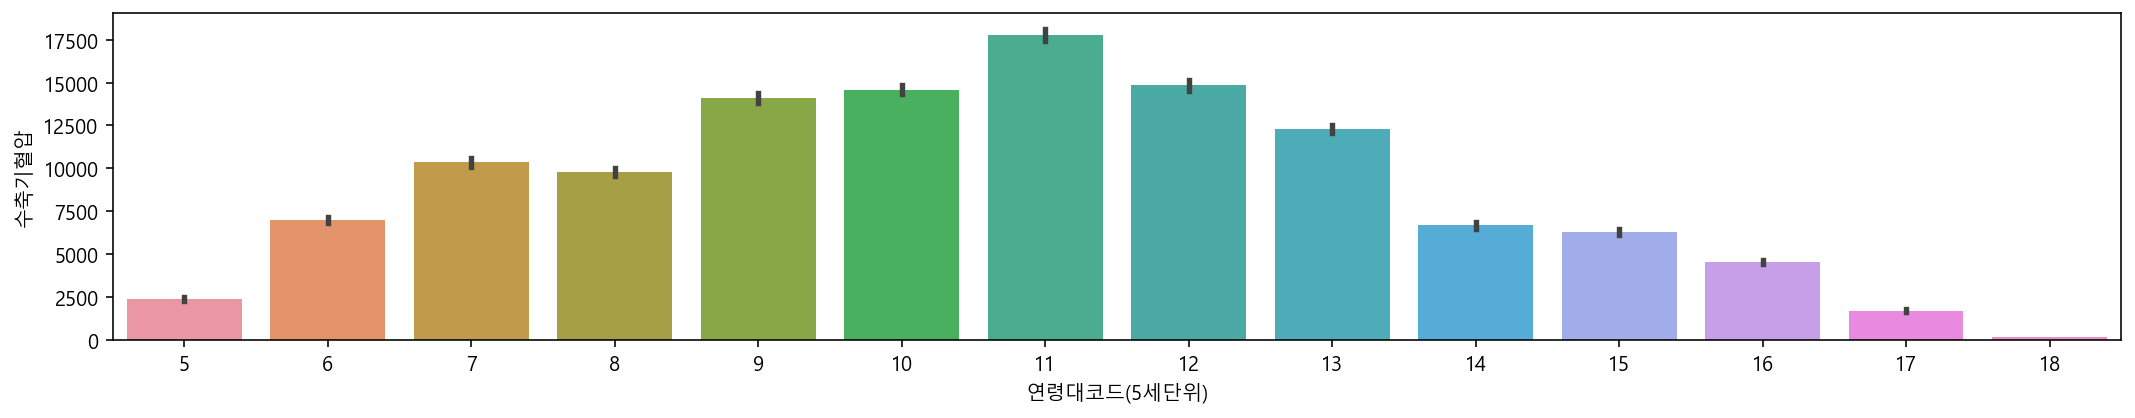

In [90]:
# y축을 평균값이 아니라 누적값으로 바꾸는 것도 가능

import numpy as np

plt.figure(figsize = (18, 3))
# sns.barplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압', estimator = np.mean)
sns.barplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압', estimator = np.sum)

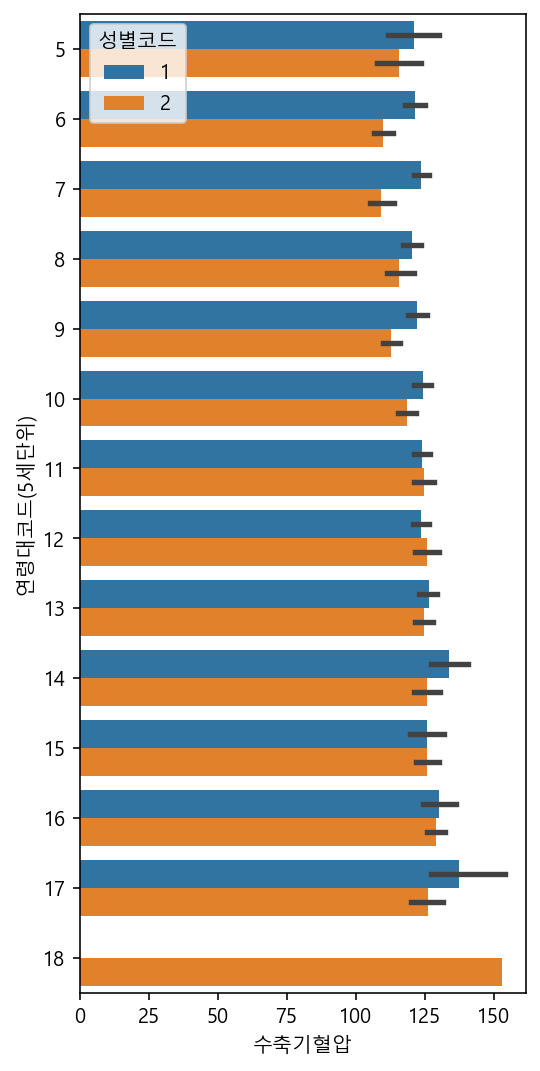

In [97]:
# x축이 너무 긴 경우
# x와 y를 바꿔도 되는데 그럼 안이쁘게 나오는 경우
# orient = 'h' 추가

plt.figure(figsize = (4, 9))
sns.barplot(data = data, y = '연령대코드(5세단위)', x = '수축기혈압', hue = '성별코드', orient = 'h')

## boxplot

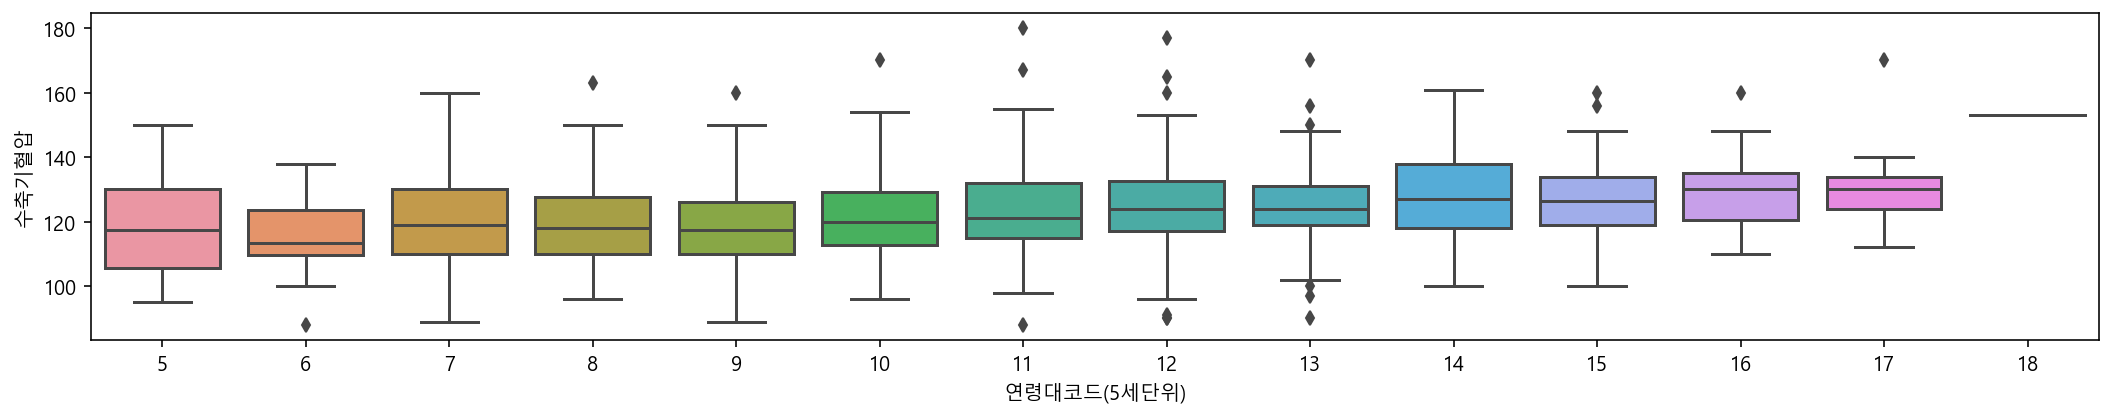

In [98]:
# 네모박스의 가운데가 평균(mean)
# 가운데와 비슷한 위치에 있는 선이 중간값(median)
# 박스의 아래와 위는 정렬한 다음 25%, 75%
# 박스 바깥에 있는 선은 신뢰구간
# 신뢰구간 바깥에 있는 점(다이아몬드)는 outlier
# 보통은 평균과 중간값이 비슷함. 그런데 데이터가 한쪽에 쏠려있거나 outlier가 많으면 평균과 중간값이 벌어짐
# 대표적인 예가 회사의 평균연봉(한쪽으로 많이 쏠려있음).
# 평균은 다 더한다음에 1/n
# 중간값은 정렬한 다음에 가운데 값(데이터가 1000개 있으면 500번째 값)

plt.figure(figsize = (18, 3))
sns.boxplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압')

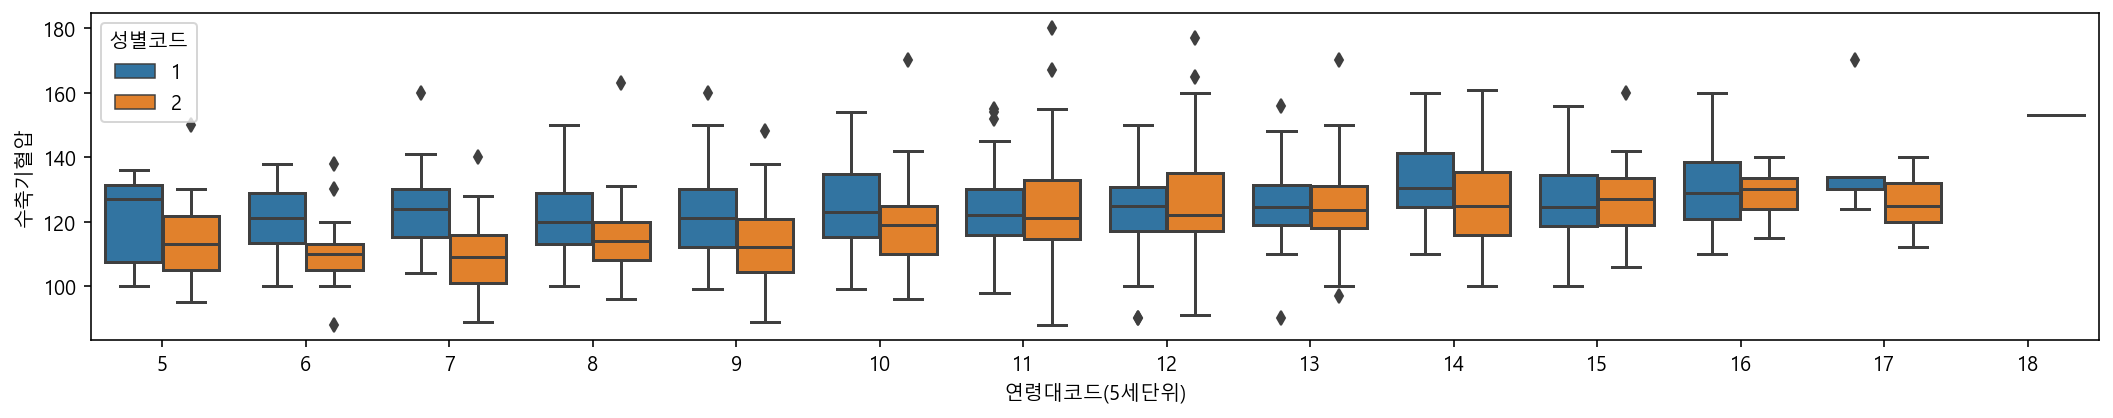

In [99]:
plt.figure(figsize = (18, 3))
sns.boxplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압', hue = '성별코드')

## violinplot

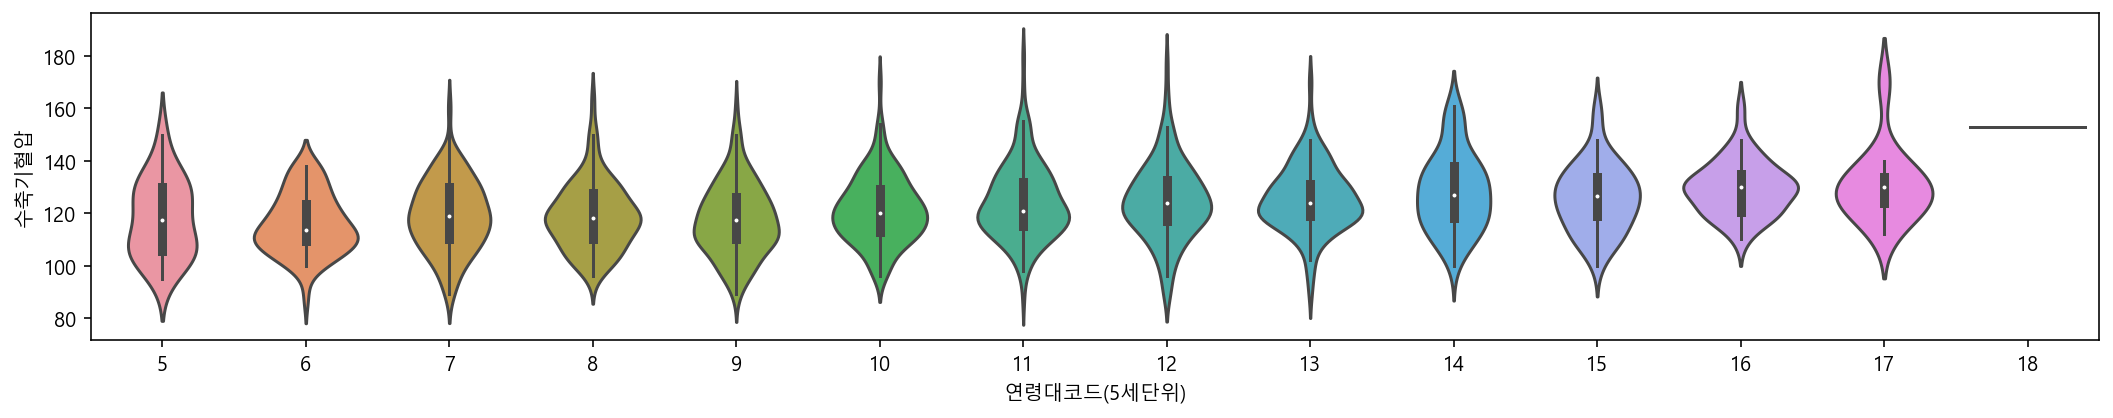

In [100]:
# 왼쪽선과 오른쪽선이 displot, 분포를 시각화

plt.figure(figsize = (18, 3))
sns.violinplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압')

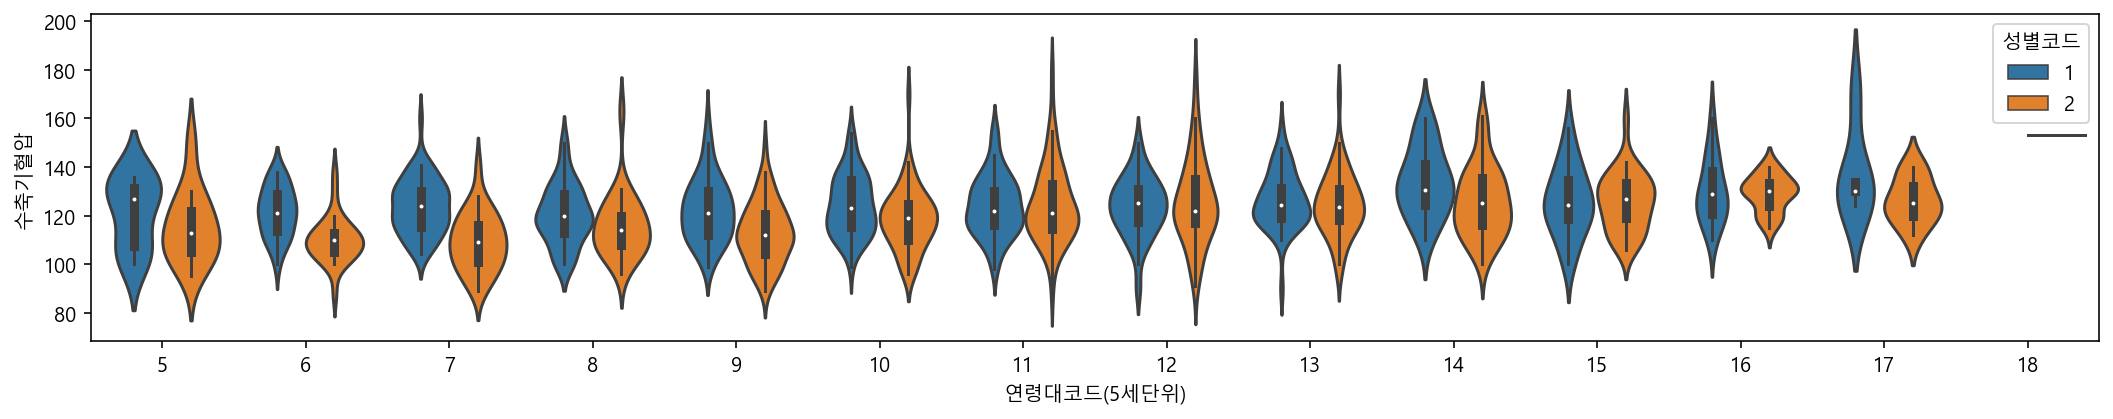

In [103]:
plt.figure(figsize = (18, 3))
sns.violinplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압', hue = '성별코드')

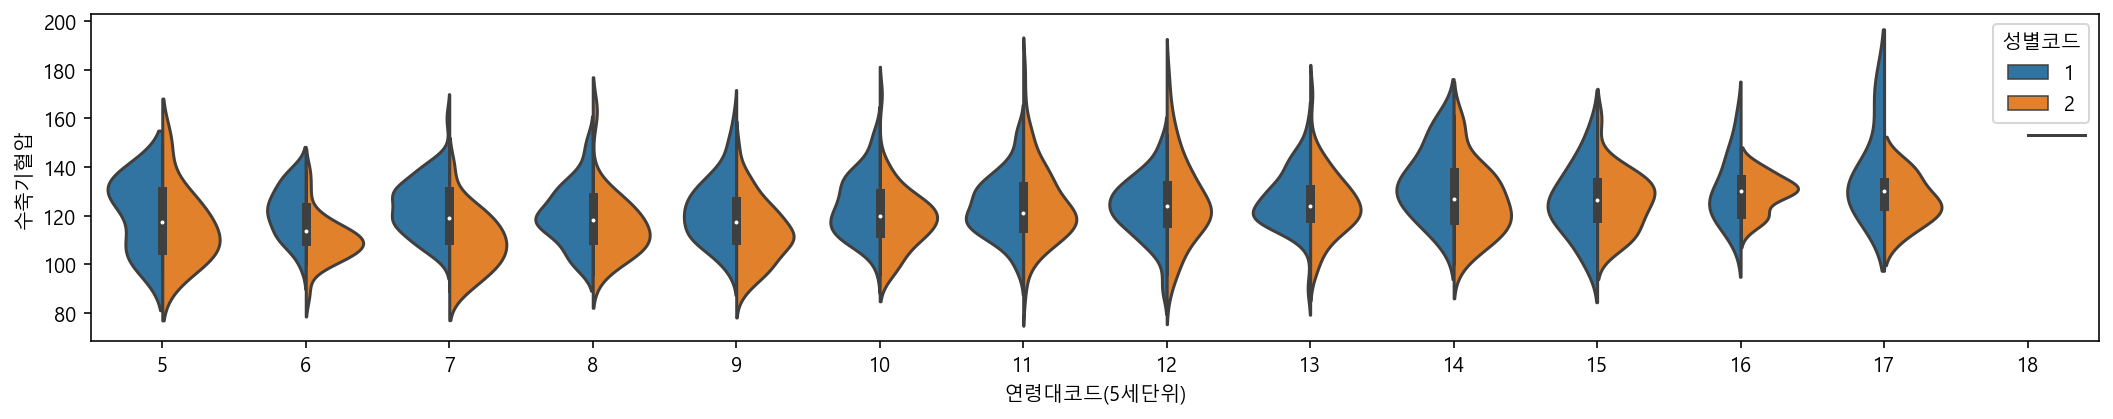

In [105]:
# split=True
# 하나의 violinplot인데 왼쪽은 남성 오른쪽은 여성

plt.figure(figsize = (18, 3))
sns.violinplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압', hue = '성별코드', split = True)

## point plot

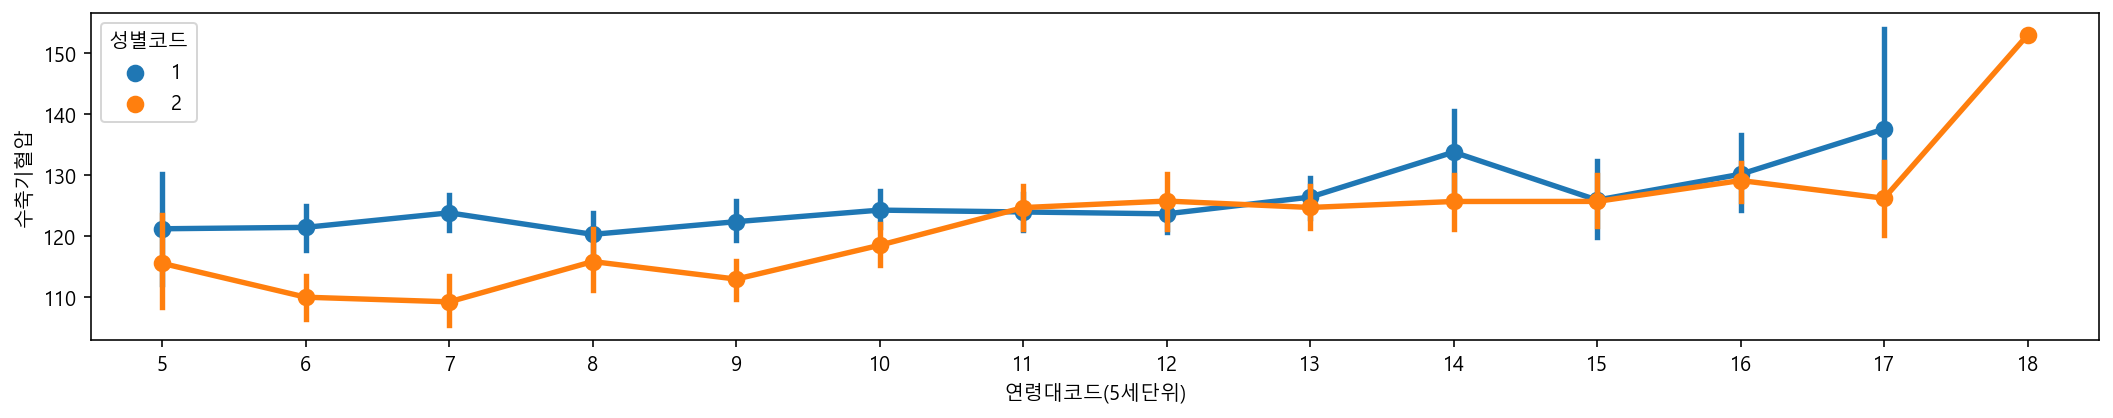

In [107]:
# 왼쪽에서 오른쪽으로 선을 그려주는 것이 pointplot
# x축이 서로 간에 연관성이 없으면 barplot
# x축이 서로 간에 연관성이 있으면, 특히 순서에 연관이 있으면 pointplot

plt.figure(figsize = (18, 3))
sns.pointplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압', hue = '성별코드')

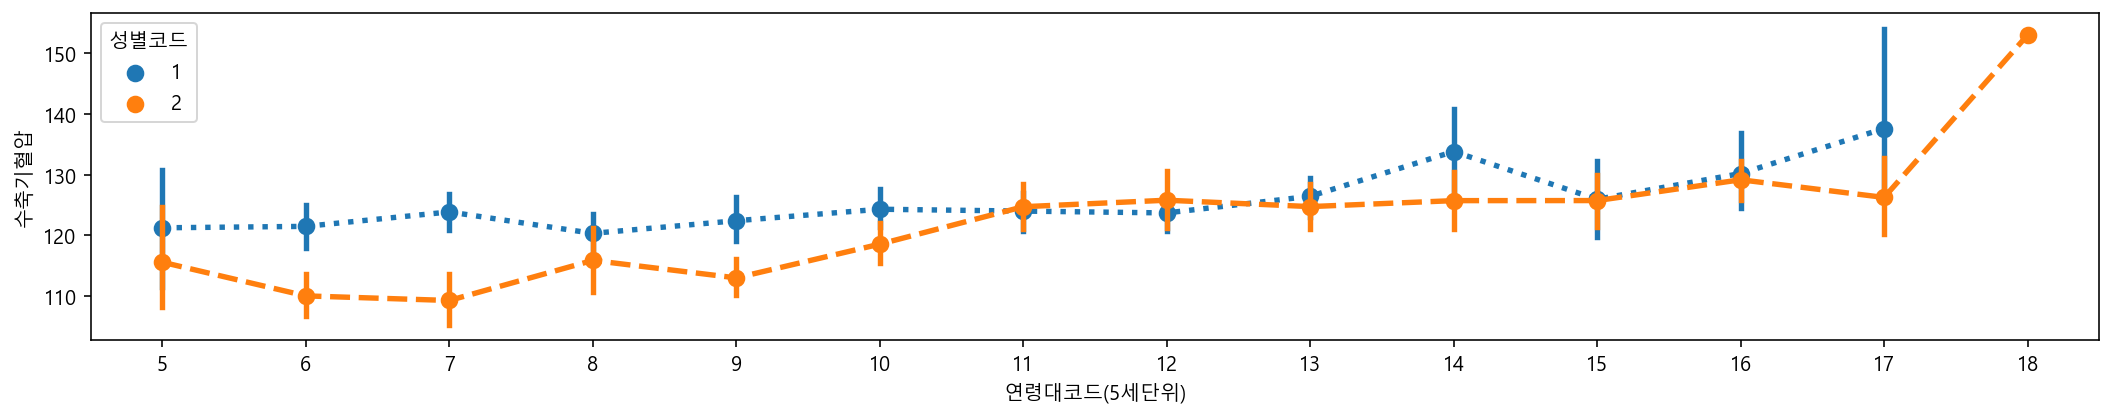

In [108]:
# linestyles의 종료 같은 건 구글에서 찾아보면됨

plt.figure(figsize = (18, 3))
sns.pointplot(data = data, x = '연령대코드(5세단위)', y = '수축기혈압', hue = '성별코드', linestyles = [':', '--'])

## scatterplot

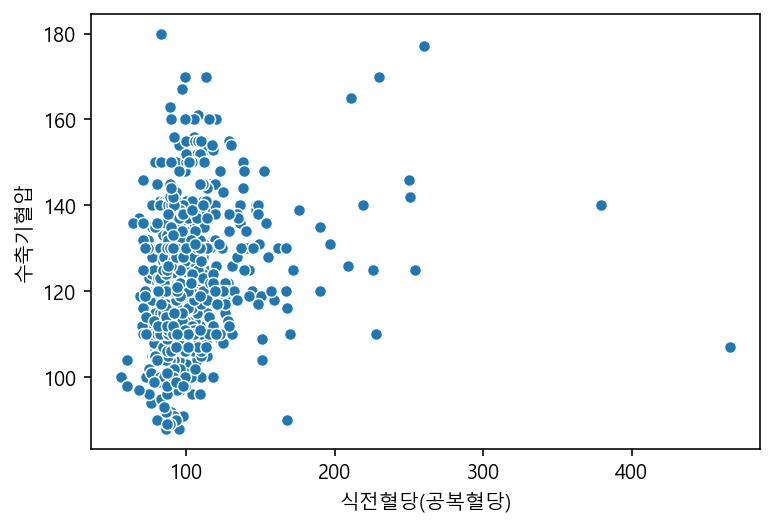

In [109]:
sns.scatterplot(data = data, x = '식전혈당(공복혈당)', y = '수축기혈압')

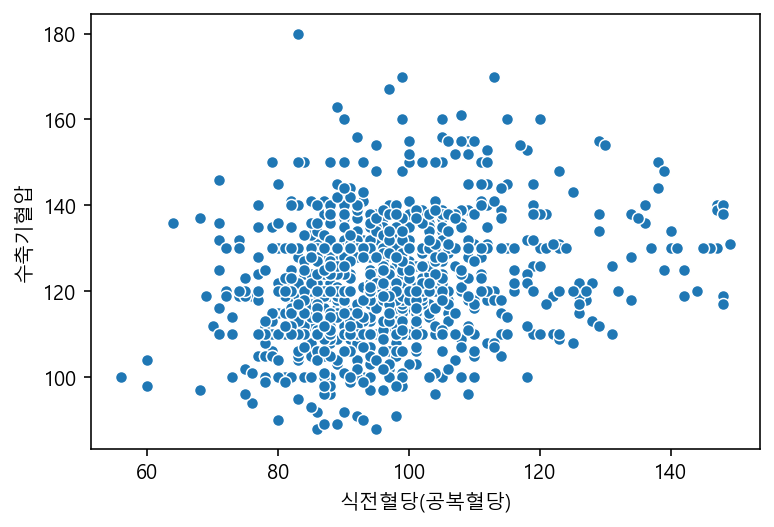

In [110]:
# 150 under만 살리고 싶음

target = data[data['식전혈당(공복혈당)'] < 150]
sns.scatterplot(data = target, x = '식전혈당(공복혈당)', y = '수축기혈압')

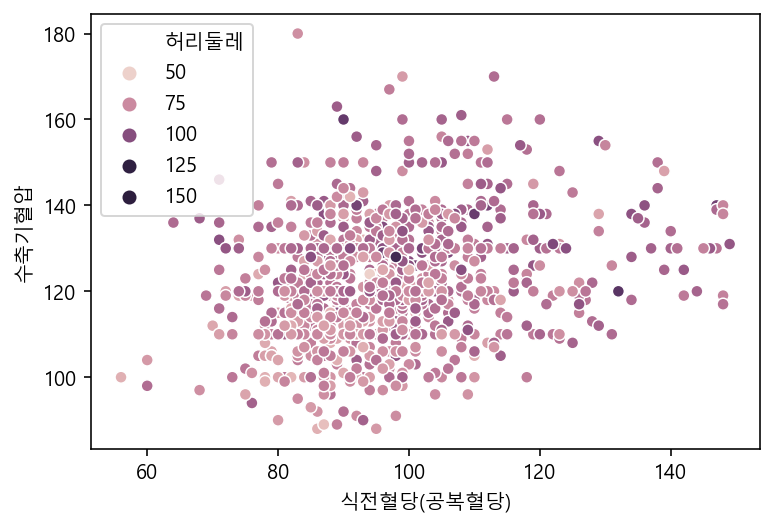

In [111]:
# hue = '허리둘레'
# 허리둘레가 두꺼워질수록 칼라가 진해짐

sns.scatterplot(data = target, x = '식전혈당(공복혈당)', y = '수축기혈압', hue = '허리둘레')

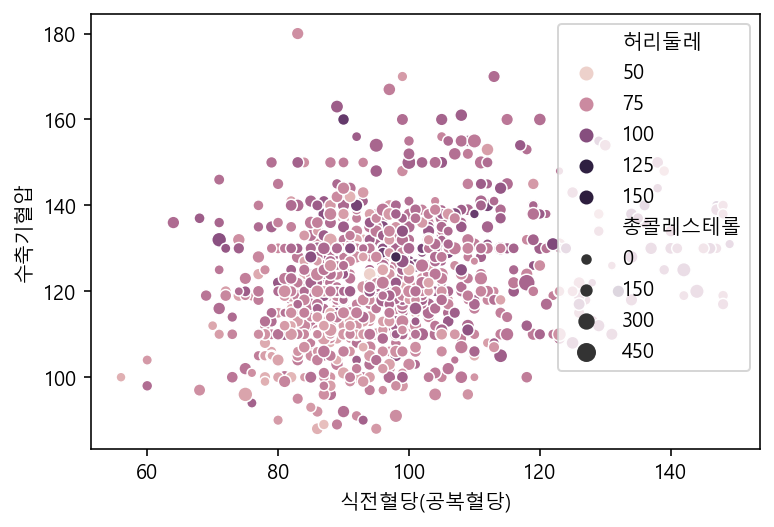

In [112]:
# size = '총콜레스테롤'
# 콜레스테롤 수치가 높을수록 원이 커짐

sns.scatterplot(data = target, x = '식전혈당(공복혈당)', y = '수축기혈압', hue = '허리둘레', size = '총콜레스테롤')

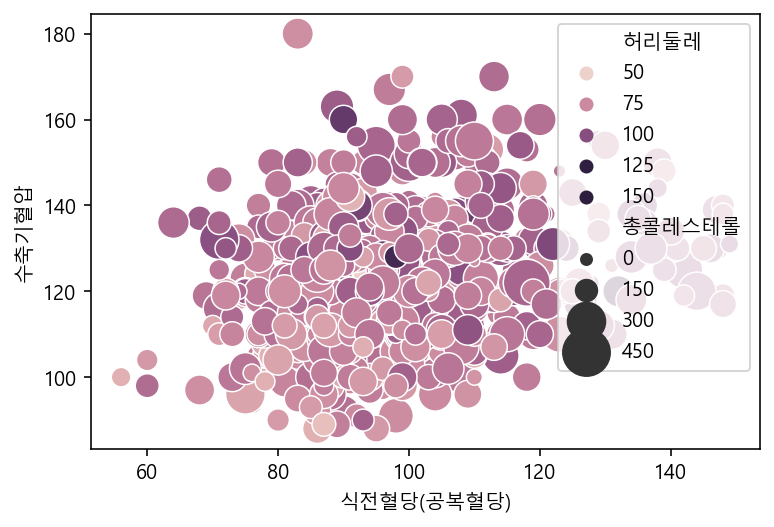

In [114]:
# sizes = (30, 550)
# 원이 가장 작을 때가 콜레스테롤 30, 가장 클 때가 콜레스테롤 550

sns.scatterplot(data = target, x = '식전혈당(공복혈당)', y = '수축기혈압', hue = '허리둘레', size = '총콜레스테롤', sizes = (30, 550))

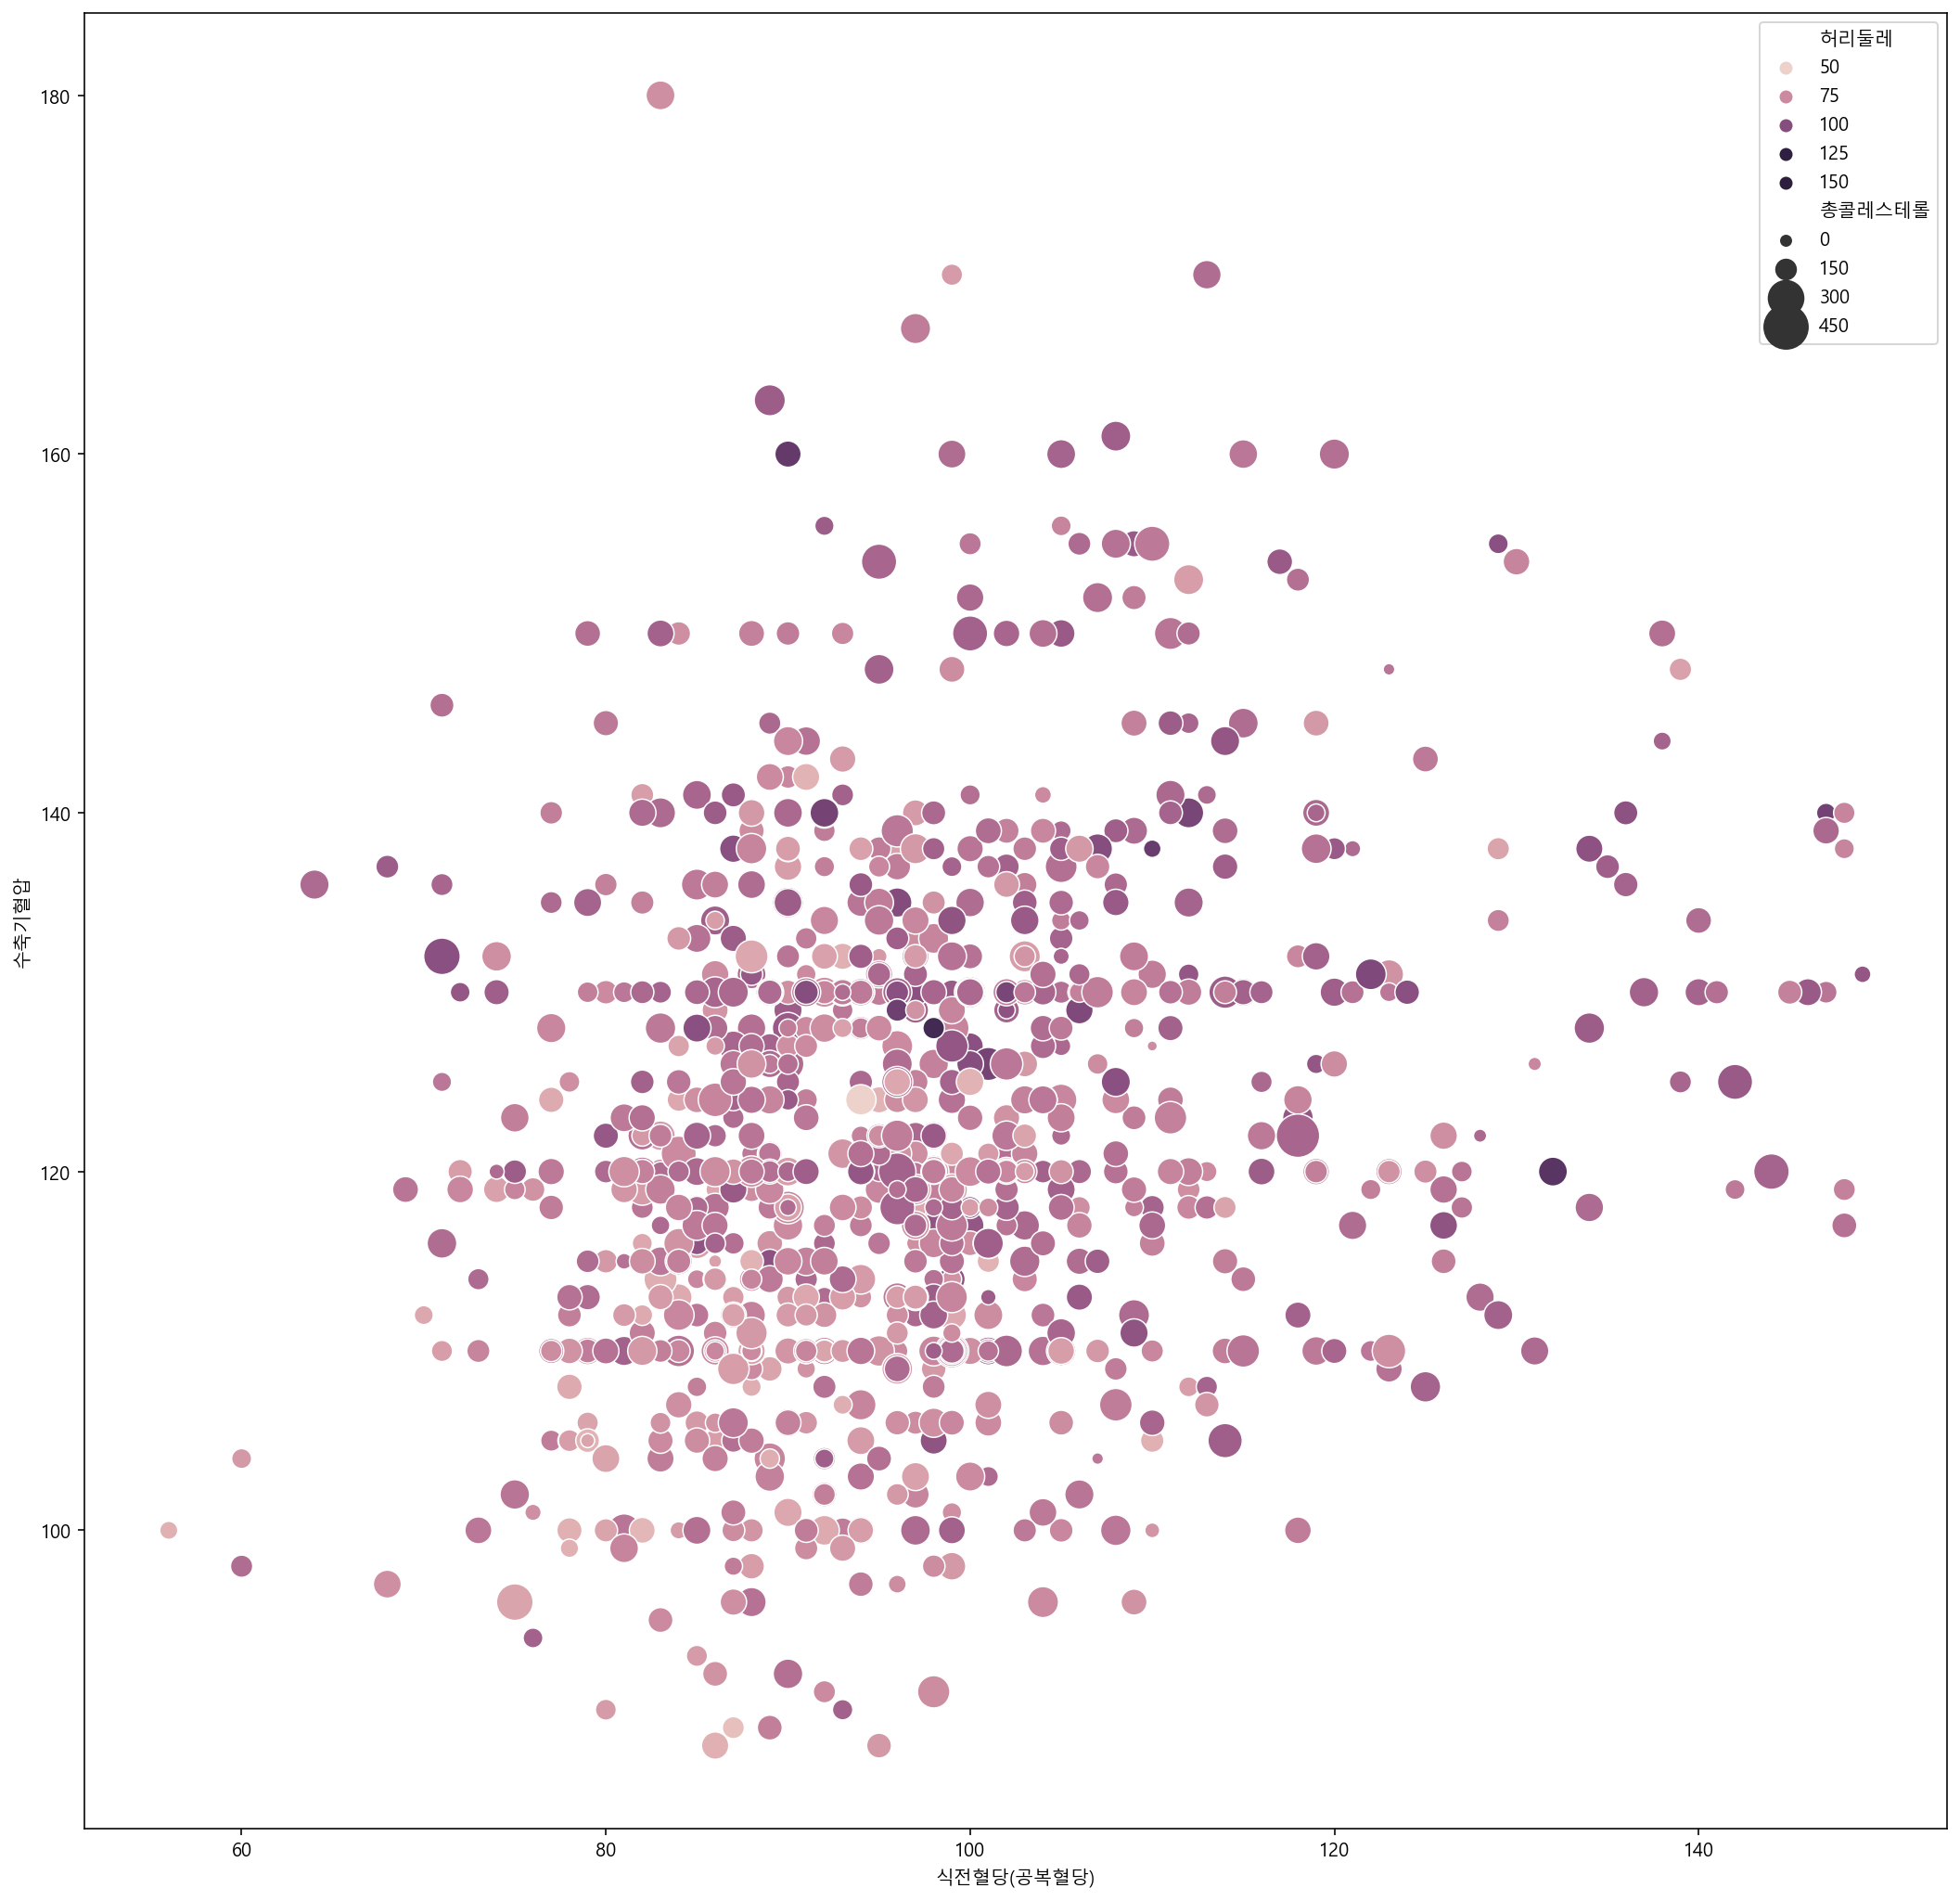

In [115]:
# figsize 옵션 추가

plt.figure(figsize = (18, 18))

target = data[data['식전혈당(공복혈당)'] < 150]

sns.scatterplot(data = target, x = '식전혈당(공복혈당)', y = '수축기혈압', hue = '허리둘레', size = '총콜레스테롤', sizes = (30, 550))

### scatterplot은 정보량을 많이 넣을 수 있어서 편리함(허리둘레, 콜레스테롤 등등)

### 내가 원하는 그림이 안나와서 직관적으로 데이터를 분석할 수 없는 경우

### seaborn의 갤러리탭에 가서 다양한 시각화를 볼 수 있음